In [2]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
# import OS module
import os
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [3]:
path = "http://localhost:8888/tree/Documents/GitHub/Gas_Sensor_Calibration/Mobile data"

obj = os.scandir()
 
# List all files and directories in the specified path
print("Files and Directories in '% s':" % path)
for entry in obj:
    if entry.is_dir() or entry.is_file():
        print(entry.name)

Files and Directories in 'http://localhost:8888/tree/Documents/GitHub/Gas_Sensor_Calibration/Mobile data':
Aero_devicec5_1nov.csv
.~lock.Aero_AQ50_1nov.csv#
20211101-113150.gpx
1_November.ipynb
1nov_route.csv
aeroqual_011121.csv
Aero_AQ50_1nov.csv
.~lock.Aero_device61_1nov.csv#
GPS_Aero&AQ50_1nov.csv
Aero_AQ24_1nov.csv
AQ24_1nov.csv
Aero_device61_1nov.csv
Aero_gases_1nov.csv
Aero_device76_1nov.csv
GPS_Aero&gases_1nov.csv
GPS_Aero&AQ24_1nov.csv
AQ50_1nov.csv
.ipynb_checkpoints
Gases_1nov.csv


In [39]:
a = pd.read_csv('Aero_AQ50_1nov.csv', parse_dates = ['created_at'])
b = pd.read_csv('Aero_AQ24_1nov.csv',  parse_dates = ['created_at'])
c = pd.read_csv('Aero_gases_1nov.csv',  parse_dates = ['created_at'])

In [42]:
print(list(a), len(a))
print(list(b), len(b))
print(list(c), len(c))

211
264
24


In [40]:
a[' PM10(ppm)'] = pd.to_numeric(a[' PM10(ppm)'], errors='coerce')
a[' PM2.5(ppm)'] = pd.to_numeric(a[' PM2.5(ppm)'], errors='coerce')
b[' PM10(ppm)'] = pd.to_numeric(b[' PM10(ppm)'], errors='coerce')
b[' PM2.5(ppm)'] = pd.to_numeric(b[' PM2.5(ppm)'], errors='coerce')
c[' CO(ppm)'] = pd.to_numeric(c[' CO(ppm)'], errors='coerce')


In [43]:
a = a.dropna(subset=[' PM10(ppm)', ' PM2.5(ppm)'])
b = b.dropna(subset=[' PM10(ppm)', ' PM2.5(ppm)'])
c = c.dropna(subset=[' CO(ppm)'])
#s = c.dropna(subset=[' SO2(ppm)'])

print(len(a))
print(len(b))
print(len(c))
#print(len(s))

211
264
24


In [25]:
print(a.dtypes)
print(b.dtypes)
print(c.dtypes)


created_at      datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 CO(ppm)                object
 PM10(ppm)             float64
 PM2.5(ppm)            float64
pm10                   float64
pm2.5                  float64
RH                     float64
Temperature            float64
dtype: object
created_at      datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 CO(ppm)                object
 PM10(ppm)             float64
 PM2.5(ppm)            float64
pm10                   float64
pm2.5                  float64
RH                     float64
Temperature            float64
dtype: object
created_at      datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 CO(ppm)               float64
 PM10(ppm)             float64
 PM2.5(ppm)            float64
CO_1                   float64
SO2_1                  float64
CO_2                   float64
SO2_2                  float64
Temperature            float64
RH         

# AQ50

In [44]:

fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.01)

fig.add_trace(go.Scatter(x=a['created_at'], y=a[' PM10(ppm)']*1000, name = 'Aeroqual PM10', xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=a['created_at'], y=a['pm10'], name = 'AQ50 PM10',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)


fig.add_trace(go.Scatter(x=a['created_at'], y=a[' PM2.5(ppm)']*1000, name = 'Aeroqual PM2.5',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=a['created_at'], y=a['pm2.5'], name = 'AQ50 PM2.5',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)



fig.update_layout(height=600, width=1000,
                  title_text="Stacked Subplots with Shared X-Axes")



# Create axis objects
fig.update_layout(
    xaxis2=dict(title ="Timestamp",domain=[0.8, 0.7]),
    yaxis=dict(title="PM2.5"),
    yaxis2=dict(title="PM10"),
   
   
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)


fig.show()

# AQ 24

In [45]:

fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.01)

fig.add_trace(go.Scatter(x=b['created_at'], y=b[' PM10(ppm)']*1000, name = 'Aeroqual PM10', xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=b['created_at'], y=b['pm10'], name = 'AQ24 PM10',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)


fig.add_trace(go.Scatter(x=b['created_at'], y=b[' PM2.5(ppm)']*1000, name = 'Aeroqual PM2.5',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=b['created_at'], y=b['pm2.5'], name = 'AQ24 PM2.5',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)



fig.update_layout(height=600, width=1000,
                  title_text="Stacked Subplots with Shared X-Axes")



# Create axis objects
fig.update_layout(
    xaxis2=dict(title ="Timestamp",domain=[0.8, 0.7]),
    yaxis=dict(title="PM2.5"),
    yaxis2=dict(title="PM10"),
   
   
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)


fig.show()

# Gases

In [46]:

fig = make_subplots(rows=4, cols=1,
                    shared_xaxes=False,
                    vertical_spacing=0.1)

fig.add_trace(go.Scatter(x=c['created_at'], y=c['CO_1'], name = 'Gas node CO-1', xaxis="x4",yaxis = 'y4'),
              row=4, col=1)

fig.add_trace(go.Scatter(x=c['created_at'], y=c[' CO(ppm)'], name = 'Aeroqual CO',  xaxis="x4",yaxis = 'y4'),
              row=4, col=1)


fig.add_trace(go.Scatter(x=c['created_at'], y=c['CO_2'], name = 'Gas node CO-2',  xaxis="x3",yaxis = 'y3'),
              row=3, col=1)

fig.add_trace(go.Scatter(x=c['created_at'], y=c[' CO(ppm)'], name = 'Aeroqual CO',  xaxis="x3",yaxis = 'y3'),
              row=3, col=1)

fig.add_trace(go.Scatter(x=c['created_at'], y = c['SO2_1'], name = 'Gas node SO2-1',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=c['created_at'], y=c[' CO(ppm)'], name = 'Aeroqual CO',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=c['created_at'], y = c['SO2_2'], name = 'Gas node SO2-2',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=c['created_at'], y=c[' CO(ppm)'], name = 'Aeroqual CO',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.update_layout(height=1000, width=1000,
                  title_text="Stacked Subplots with Shared X-Axes")



# Create axis objects
fig.update_layout(
    xaxis4=dict(title ="Timestamp",domain=[0.8, 0.7]),
    xaxis3=dict(title ="Timestamp",domain=[0.8, 0.7]),
    xaxis2=dict(title ="Timestamp",domain=[0.8, 0.7]),
    xaxis=dict(title ="Timestamp",domain=[0.8, 0.7]),
    yaxis=dict(title="SO2"),
    yaxis2=dict(title="SO2"),
    yaxis3=dict(title="CO"),
    yaxis4=dict(title="CO"),
   
   
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)


fig.show()

"plt.plot(x,y2, 'b', label= 'AQ24')\nplt.xlabel('Timestamp')\nplt.ylabel('PM10 in ppm')\nplt.title('PM10 Aeroqual vs AQ24')\nplt.legend()\nplt.show()\nplt.figure(figsize = (15, 5))\nplt.plot(x,y3, 'r', label = 'Aeroqual')\nplt.plot(x,y4, 'b', label= 'AQ24')\nplt.xlabel('Timestamp')\nplt.ylabel('PM2.5 in ppm')\nplt.title('PM2.5 Aeroqual vs AQ24')\nplt.legend()\nplt.show()"

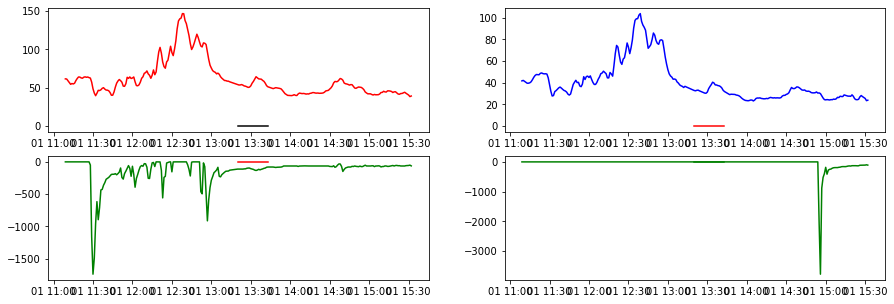

In [44]:
x = c['created_at']
y1 = c['CO_1']
y2 = c['SO2_1']
y3 = c['CO_2']
y4 = c['SO2_2']
y5 = c[' CO(ppm)']*1000
fig, axs = plt.subplots(2,2,figsize = (15, 5))
axs[0,0].plot(x,y1, 'r', label = 'CO_1')
axs[0,0].plot(x,y5, 'k', label = 'Aeroqual')
axs[0,1].plot(x,y2, 'b', label = 'SO2_1')
axs[0,1].plot(x,y5, 'r', label = 'Aeroqual')
axs[1,0].plot(x,y3, 'g', label = 'CO_2')
axs[1,0].plot(x,y5, 'r', label = 'Aeroqual')
axs[1,1].plot(x,y4, 'g', label = 'SO2_2')
axs[1,1].plot(x,y5, 'g', label = 'Aeroqual')

'''plt.plot(x,y2, 'b', label= 'AQ24')
plt.xlabel('Timestamp')
plt.ylabel('PM10 in ppm')
plt.title('PM10 Aeroqual vs AQ24')
plt.legend()
plt.show()
plt.figure(figsize = (15, 5))
plt.plot(x,y3, 'r', label = 'Aeroqual')
plt.plot(x,y4, 'b', label= 'AQ24')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 in ppm')
plt.title('PM2.5 Aeroqual vs AQ24')
plt.legend()
plt.show()'''


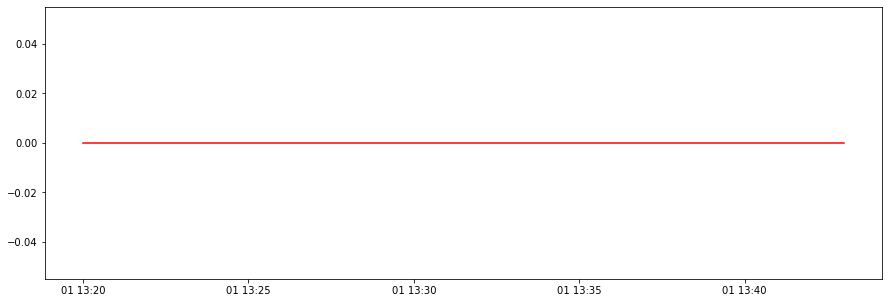

In [45]:
x = c['created_at']
y1 = c[' CO(ppm)']*1000

plt.figure(figsize = (15, 5))
plt.plot(x,y1, 'r', label = 'Aeroqual')
plt.show()

# Megasense

## Device 76

In [3]:
d1 = pd.read_csv('Aero_device76_1nov.csv', parse_dates = ['Date Time'])
d1[' PM10(ppm)'] = pd.to_numeric(d1[' PM10(ppm)'], errors='coerce')
d1[' PM2.5(ppm)'] = pd.to_numeric(d1[' PM2.5(ppm)'], errors='coerce')
d1[' CO(ppm)'] = pd.to_numeric(d1[' CO(ppm)'], errors='coerce')

In [4]:
print(len(d1))
print(d1.info())

173
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date Time                   173 non-null    datetime64[ns]
 1    Monitor ID                 173 non-null    int64         
 2    Location ID                173 non-null    int64         
 3    CO(ppm)                    24 non-null     float64       
 4    PM10(ppm)                  149 non-null    float64       
 5    PM2.5(ppm)                 149 non-null    float64       
 6   Unnamed: 0                  173 non-null    float64       
 7   timestamp                   173 non-null    float64       
 8   temp_c                      173 non-null    float64       
 9   hum_prcnt                   173 non-null    float64       
 10  press_hpa                   173 non-null    float64       
 11  ozone_ppm                   173 non-null    float64   

In [12]:
import plotly.express as px

fig = px.line(d1, x="Date Time", y="temp_c", title='Temperature')
fig = px.line(d1, x="Date Time", y="hum_prcnt", title='Humidity')
fig.show()

In [26]:


fig = make_subplots(rows=5, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.01)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['temp_c'], name = 'Temperature', xaxis="x5",yaxis = 'y5'),
              row=5, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['hum_prcnt'], name = 'Humidity',  xaxis="x4",yaxis = 'y4'),
              row=4, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['co_ppm'], name = 'CO(ppm) Megasense',  xaxis="x3",yaxis = 'y3'),
              row=3, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['ozone_ppm'], name = 'O3(ppm) Megasense',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['no2_ppb'], name = 'NO2(ppb) Megasense',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.update_layout(height=600, width=1000,
                  title_text="Stacked Subplots with Shared X-Axes")



# Create axis objects
fig.update_layout(
    xaxis5=dict(title ="Timestamp",domain=[0.8, 0.7]),
    yaxis=dict(title="NO2"),
    yaxis2=dict(title="Ozone"),
    yaxis3=dict(title="CO"),
    yaxis4=dict(title="Humidity"),
    yaxis5=dict(title="Temperature"),
        
   
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)


fig.show()

## Device 61




In [34]:
d1 = pd.read_csv('Aero_device61_1nov.csv', parse_dates = ['Date Time'])
d1[' PM10(ppm)'] = pd.to_numeric(d1[' PM10(ppm)'], errors='coerce')
d1[' PM2.5(ppm)'] = pd.to_numeric(d1[' PM2.5(ppm)'], errors='coerce')
d1[' CO(ppm)'] = pd.to_numeric(d1[' CO(ppm)'], errors='coerce')

In [35]:

fig = make_subplots(rows=5, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.01)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['temp_c'], name = 'Temperature', xaxis="x5",yaxis = 'y5'),
              row=5, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['hum_prcnt'], name = 'Humidity',  xaxis="x4",yaxis = 'y4'),
              row=4, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['co_ppm'], name = 'CO(ppm) Megasense',  xaxis="x3",yaxis = 'y3'),
              row=3, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['ozone_ppm'], name = 'O3(ppm) Megasense',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['no2_ppb'], name = 'NO2(ppb) Megasense',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.update_layout(height=600, width=1000,
                  title_text="Stacked Subplots with Shared X-Axes")



# Create axis objects
fig.update_layout(
    xaxis5=dict(title ="Timestamp",domain=[0.8, 0.7]),
    yaxis=dict(title="NO2"),
    yaxis2=dict(title="Ozone"),
    yaxis3=dict(title="CO"),
    yaxis4=dict(title="Humidity"),
    yaxis5=dict(title="Temperature"),
        
   
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)


fig.show()

## Device C5

In [37]:
d1 = pd.read_csv('Aero_devicec5_1nov.csv', parse_dates = ['Date Time'])
d1[' PM10(ppm)'] = pd.to_numeric(d1[' PM10(ppm)'], errors='coerce')
d1[' PM2.5(ppm)'] = pd.to_numeric(d1[' PM2.5(ppm)'], errors='coerce')
d1[' CO(ppm)'] = pd.to_numeric(d1[' CO(ppm)'], errors='coerce')

In [38]:


fig = make_subplots(rows=5, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.01)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['temp_c'], name = 'Temperature', xaxis="x5",yaxis = 'y5'),
              row=5, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['hum_prcnt'], name = 'Humidity',  xaxis="x4",yaxis = 'y4'),
              row=4, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['co_ppm'], name = 'CO(ppm) Megasense',  xaxis="x3",yaxis = 'y3'),
              row=3, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['ozone_ppm'], name = 'O3(ppm) Megasense',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['no2_ppb'], name = 'NO2(ppb) Megasense',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.update_layout(height=600, width=1000,
                  title_text="Stacked Subplots with Shared X-Axes")



# Create axis objects
fig.update_layout(
    xaxis5=dict(title ="Timestamp",domain=[0.8, 0.7]),
    yaxis=dict(title="NO2"),
    yaxis2=dict(title="Ozone"),
    yaxis3=dict(title="CO"),
    yaxis4=dict(title="Humidity"),
    yaxis5=dict(title="Temperature"),
        
   
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)


fig.show()